In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
# Load the dataset
# put your file path here
file_path_1 = 'Netflix_cleaned_1.csv'
file_path_2 = 'Hulu_cleaned_1.csv'
df_netflix = pd.read_csv(file_path_1)
df_hulu = pd.read_csv(file_path_2)

In [3]:
hulu_columns = list(df_hulu.columns)
netflix_columns = list(df_netflix.columns)
unique_to_hulu = set(hulu_columns) - set(netflix_columns)
unique_to_netflix = set(netflix_columns) - set(hulu_columns)
print("Columns unique to Hulu:", unique_to_hulu)
print("Columns unique to Netflix:", unique_to_netflix)

Columns unique to Hulu: set()
Columns unique to Netflix: set()


In [4]:
# Order columns alphabetically
df_hulu = df_hulu[sorted(df_hulu.columns)]
df_netflix = df_netflix[sorted(df_netflix.columns)]

# Add the service column
df_hulu['service'] = 'hulu'
df_netflix['service'] = 'netflix'

# Combine the dataframes
combined_df = pd.concat([df_hulu, df_netflix], ignore_index=True)
combined_df.to_csv('combined_data.csv', index=False)

In [5]:
df = pd.read_csv('combined_data.csv')

In [6]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [7]:
'''
#3 (victor)
Question: what age group are they targeting distrution of rating
Columns req: "rating", count of "type", "year" (maybe to show the trend in target audience)
comments:
Business perspective:
more content in the rating of "anyone can watch sort of type" means that
the range and count of target audiences more thus increasing the subscriptions (??? not quite sure here as well)
'''

'\n#3 (victor)\nQuestion: what age group are they targeting distrution of rating\nColumns req: "rating", count of "type", "year" (maybe to show the trend in target audience)\ncomments:\nBusiness perspective:\nmore content in the rating of "anyone can watch sort of type" means that\nthe range and count of target audiences more thus increasing the subscriptions (??? not quite sure here as well)\n'

In [8]:
list(df['rating'].unique())

['tv-14',
 'tv-pg',
 'pg-13',
 'tv-ma',
 'r',
 'tv-g',
 'pg',
 'tv-y7',
 'tv-y',
 'g',
 'nc-17',
 'nr',
 'tv-y7-fv',
 'ur']

In [9]:
sorted(df['release_year'].unique())

[np.int64(2010),
 np.int64(2011),
 np.int64(2012),
 np.int64(2013),
 np.int64(2014),
 np.int64(2015),
 np.int64(2016),
 np.int64(2017),
 np.int64(2018),
 np.int64(2019),
 np.int64(2020),
 np.int64(2021)]

In [10]:
sorted(list(df['year'].unique()))

[np.int64(2011),
 np.int64(2012),
 np.int64(2013),
 np.int64(2014),
 np.int64(2015),
 np.int64(2016),
 np.int64(2017),
 np.int64(2018),
 np.int64(2019),
 np.int64(2020),
 np.int64(2021)]

In [11]:
# Ensure the mapping for age groups includes all unique ratings
age_groups = {
    'G': 'Kids',
    'TV-Y': 'Kids',
    'TV-Y7': 'Kids',
    'TV-G': 'Kids',
    'PG': 'Teens',
    'PG-13': 'Teens',
    'TV-PG': 'Teens',
    'TV-14': 'Teens',
    'R': 'Adults',
    'NC-17': 'Adults',
    'TV-MA': 'Adults',
    'NR': 'Adults',
    'UR': 'Adults',
    'TV-Y7-FV': 'Kids',
    'pg-13': 'Teens',
    'tv-ma': 'Adults',
    'pg': 'Teens',
    'tv-14': 'Teens',
    'tv-pg': 'Teens',
    'tv-y': 'Kids',
    'tv-y7': 'Kids',
    'r': 'Adults',
    'tv-g': 'Kids',
    'g': 'Kids',
    'nc-17': 'Adults',
    'nr': 'Adults',
    'tv-y7-fv': 'Kids',
    'ur': 'Adults'
}

df['age_group'] = df['rating'].map(age_groups)

In [12]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Map quarters to seasons
df['season_added'] = df['date_added'].dt.quarter.map({
    1: 'Fall',
    2: 'Spring',
    3: 'Summer',
    4: 'Winter'
})

In [13]:
filther_col = ['type', 'release_year', 'age_group', 'year', 'service']
df_age = df[filther_col]
df_age.head()

,type,release_year,age_group,year,service
0,tv show,2012,Teens,2021,hulu
1,tv show,2011,Teens,2021,hulu
2,tv show,2016,Teens,2021,hulu
3,tv show,2015,Teens,2021,hulu
4,tv show,2010,Teens,2021,hulu


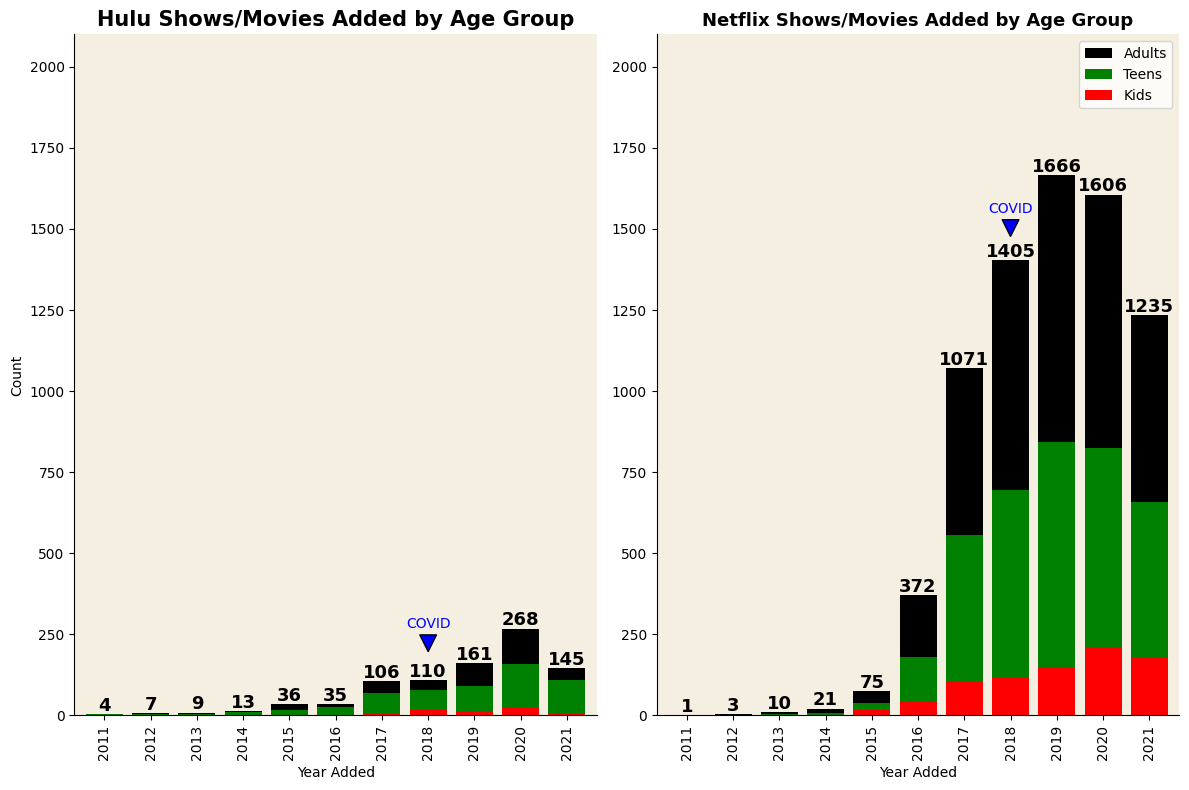

In [14]:
# Create pivot tables for Hulu and Netflix
df_hulu = df_age[df_age['service'] == 'hulu']
df_netflix = df_age[df_age['service'] == 'netflix']

# Group by year and age group to get the counts
piv_hulu = pd.crosstab(df_hulu['year'], df_hulu['age_group'])
piv_netflix = pd.crosstab(df_netflix['year'], df_netflix['age_group'])

# Desired order
desired_order = ['Kids', 'Teens', 'Adults']
piv_hulu = piv_hulu[desired_order]
piv_netflix = piv_netflix[desired_order]

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

# Plot 1: Hulu
ax1 = piv_hulu.plot.bar(stacked=True, ax=ax1, color=['red', 'green', 'black'], width=0.8)
ax1.set_title('Hulu Shows/Movies Added by Age Group', fontsize = 15, weight = 'bold')
ax1.set_xlabel('Year Added')
ax1.set_ylabel('Count')
ax1.set_ylim(0, 2100)  # Set the y-axis limit
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_facecolor('#f5efe1')

# Manually sum and label the top of the bars for Hulu
for x, y in enumerate(piv_hulu.sum(axis=1)):
    ax1.annotate(y, (x, y + 10), ha='center', fontsize=13, color='black', weight='bold')

# Plot 2: Netflix
ax2 = piv_netflix.plot.bar(stacked=True, ax=ax2, color=['red', 'green', 'black'], width=0.8)
ax2.set_title('Netflix Shows/Movies Added by Age Group', fontsize = 13, weight = 'bold')
ax2.set_xlabel('Year Added')
ax2.set_ylabel('')
ax2.set_ylim(0, 2100)  # Set the y-axis limit
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_facecolor('#f5efe1')

# Manually sum and label the top of the bars for Netflix
for x, y in enumerate(piv_netflix.sum(axis=1)):
    ax2.annotate(y, (x, y + 10), ha='center', fontsize=13, color='black', weight='bold')

# Custom legend order and formatting
for ax in [ax1, ax2]:
    handles, labels = ax.get_legend_handles_labels()
    order = [2, 1, 0]  # Adults, Teens, Kids
    ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order])

# Annotate 2018 as COVID year
ax1.annotate('COVID', xy=(7, 190), xytext=(7, 270),
             arrowprops=dict(facecolor='blue', shrink=0.1),
             fontsize=10, color='blue', ha='center')

# Annotate 2018 as COVID year
ax2.annotate('COVID', xy=(7, 1470), xytext=(7, 1550),
             arrowprops=dict(facecolor='blue', shrink=0.1),
             fontsize=10, color='blue', ha='center')


# Remove legend in plot 0
ax1.get_legend().remove()

plt.tight_layout()
plt.show()

* Both Hulu and Netflix have strategic content additions that cater to different age groups, with a notable emphasis on teens and adults.
* Netflix’s diverse and increasing content for adults and teens highlights its focus on these demographics, ensuring that subscribers in these groups have plenty of new content to explore each year.
* Hulu’s consistent addition of TV shows, particularly for teens and adults, makes it a strong contender for viewers who prefer series-based content.

In [15]:
'''
#6 (victor)
Question: use quarterly data to get counts of type released and see what types of shows are popular during which season
comments: Since most people have holidays in Dec/Jan, is the content more likely around tht season?
'''

'\n#6 (victor)\nQuestion: use quarterly data to get counts of type released and see what types of shows are popular during which season\ncomments: Since most people have holidays in Dec/Jan, is the content more likely around tht season?\n'

In [16]:
# function to calculate percentages and totals
def add_annotations(ax, df, total_size, percentage_size):
    for container in ax.containers:
        totals = df.sum(axis=1)
        for i, bar in enumerate(container):
            height = bar.get_height()
            percentage = height / totals[i] * 100
            ax.annotate(f'{percentage:.1f}%', (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                        ha='center', va='center', fontsize=percentage_size, color='white', weight='bold')

    for i, total in enumerate(df.sum(axis=1)):
        ax.annotate(f'{total}', (i, total),
                    ha='center', va='bottom', fontsize=total_size, color='black', weight='bold')

/var/folders/hb/60c6m96123sbxhdf8p4mnz6c0000gn/T/ipykernel_18827/351580620.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = height / totals[i] * 100
/var/folders/hb/60c6m96123sbxhdf8p4mnz6c0000gn/T/ipykernel_18827/351580620.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = height / totals[i] * 100
/var/folders/hb/60c6m96123sbxhdf8p4mnz6c0000gn/T/ipykernel_18827/351580620.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, u

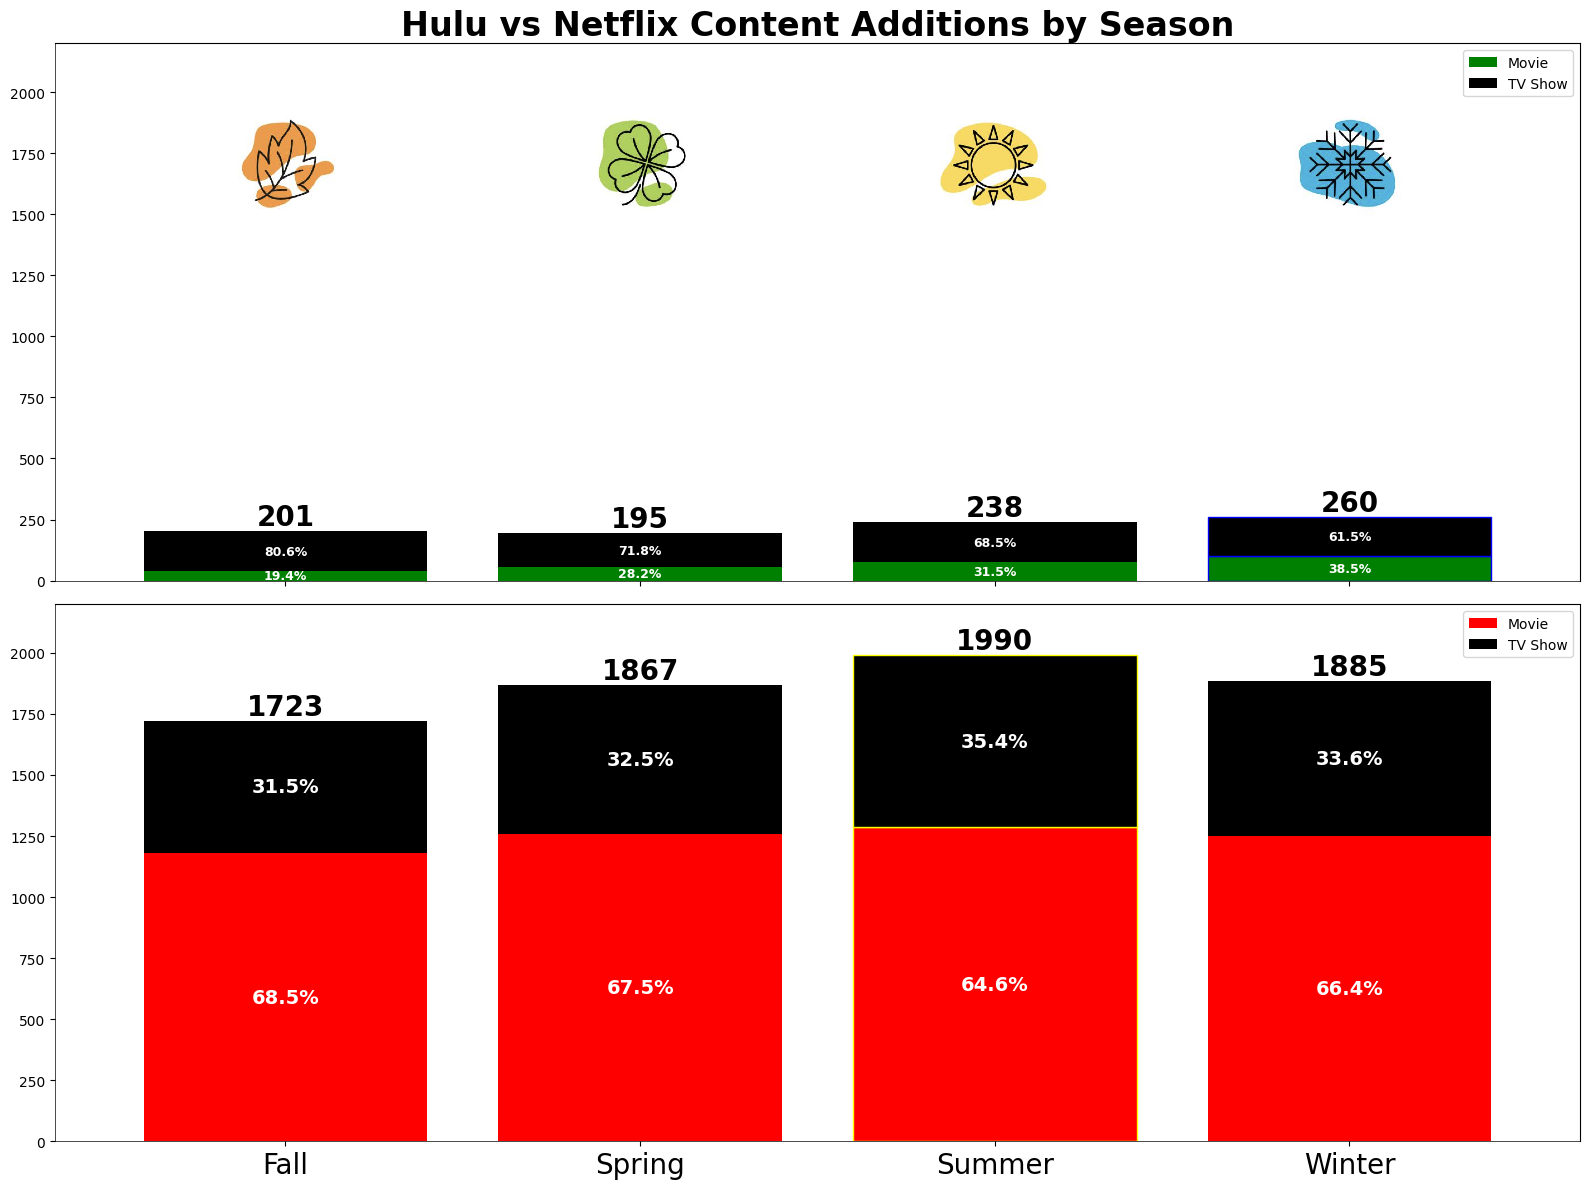

In [17]:
# Load the images
fall_img = mpimg.imread('fall.png')
spring_img = mpimg.imread('spring.png')
summer_img = mpimg.imread('summer.png')
winter_img = mpimg.imread('winter.png')

# Split the data into Hulu and Netflix
df_hulu = df[df['service'] == 'hulu']
df_netflix = df[df['service'] == 'netflix']

# Group by season and type to get the counts for Hulu
df_seasonal_hulu = df_hulu.groupby(['season_added', 'type']).size().unstack(fill_value=0)

# Group by season and type to get the counts for Netflix
df_seasonal_netflix = df_netflix.groupby(['season_added', 'type']).size().unstack(fill_value=0)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Custom colors and edgecolors
hulu_colors = ['green', 'black', 'green', 'green']
hulu_edgecolors = ['none', 'none', 'none', 'blue']  # Highlight Winter with blue border
netflix_colors = ['red', 'black', 'red', 'red']
netflix_edgecolors = ['none', 'none', 'yellow', 'none']  # Highlight Summer with yellow border

# Hulu
df_seasonal_hulu.plot(kind='bar', stacked=True, ax=ax1, color=hulu_colors, edgecolor=hulu_edgecolors, width=0.8)
ax1.set_title('Hulu vs Netflix Content Additions by Season', fontsize=24, weight='bold')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_ylim(0, 2200)  # Set the y-axis limit
ax1.set_xticklabels([])
ax1.spines['left'].set_linewidth(.5)
ax1.spines['bottom'].set_linewidth(.5)
add_annotations(ax1, df_seasonal_hulu, 20, 9)

# Netflix
df_seasonal_netflix.plot(kind='bar', stacked=True, ax=ax2, color=netflix_colors, edgecolor=netflix_edgecolors, width=0.8)
ax2.set_title('')
ax2.set_xlabel('')
ax2.set_xticklabels(['Fall', 'Spring', 'Summer', 'Winter'], rotation=360, fontsize=20)  # Change tick font size
ax2.set_ylim(0, 2200)  # Set the y-axis limit
ax2.spines['left'].set_linewidth(.5)
ax2.spines['bottom'].set_linewidth(.5)
add_annotations(ax2, df_seasonal_netflix, 20, 14)

# Add seasonality images to Hulu plot
season_images = {
    'Fall': fall_img,
    'Spring': spring_img,
    'Summer': summer_img,
    'Winter': winter_img
}

for i, season in enumerate(['Fall', 'Spring', 'Summer', 'Winter']):
    image = season_images[season]
    im = OffsetImage(image, zoom=0.2)
    ab = AnnotationBbox(im, (i, 1700), frameon=False, box_alignment=(0.5, 0.5))
    ax1.add_artist(ab)

# Custom legend for both plots
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, ['Movie', 'TV Show'], loc='upper right', fontsize=10)
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, ['Movie', 'TV Show'], loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

# Seasonal Content Additions on Hulu and Netflix

## Key Findings:
- **Hulu:**
  - **Content Peaks:** Highest number of new shows and movies in Fall
  - **Focus:** Majority of new content are TV shows, offering plenty of series to binge-watch.
  - **Numbers:** only adds around 200 shows/movies per season
- **Netflix:**
  - **Content Peaks:** consistent content additions across all seasons
  - **Focus:** Majority of new content are Moives, offering endless moive nights.
  - **Numbers:** adds a whompy 1800 shows/movies per season

## Customer Insights:
- **Hulu:**
  - **Variety:** Expect a rich selection of TV shows, especially in Fall. Ideal for those who love following multiple series.
  - **New Additions:** Keep an eye out for significant updates in Fall
- **Netflix:**
  - **Diverse Options:** Enjoy a balanced variety of movies and TV shows and endless selections.
  - **Year-Round Updates:** Benefit from consistent content updates

## Conclusion
- **Recommendation:** From a customer's point of view, Netflix is the better choice due to the sheer amount of selctions whehter its TV shows or movies. Netflix has consistent amount of content year-round updates and its diverse options ensure that there is always something new and exciting to watch, catering to a wide range of viewing preferences.